In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler

customers_path = r"C:\Users\karth\Downloads\Customers.csv"
transactions_path = r"C:\Users\karth\Downloads\Transactions.csv"

customers_df = pd.read_csv(customers_path)
transactions_df = pd.read_csv(transactions_path)

print("Customers Dataset:")
print(customers_df.head())
print("\nTransactions Dataset:")
print(transactions_df.head())



C:\Users\karth\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [2]:
# Data Preparation: Merge datasets on CustomerID
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')

# Feature Engineering: Create customer profiles
customer_profile = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

customer_profile.columns = ['CustomerID', 'TotalSpending', 'TransactionCount']



In [3]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(customer_profile[['TotalSpending', 'TransactionCount']])

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
db_indices = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(kmeans.score(X))
    db_indices.append(davies_bouldin_score(X, kmeans.labels_))



Text(0, 0.5, 'Inertia')

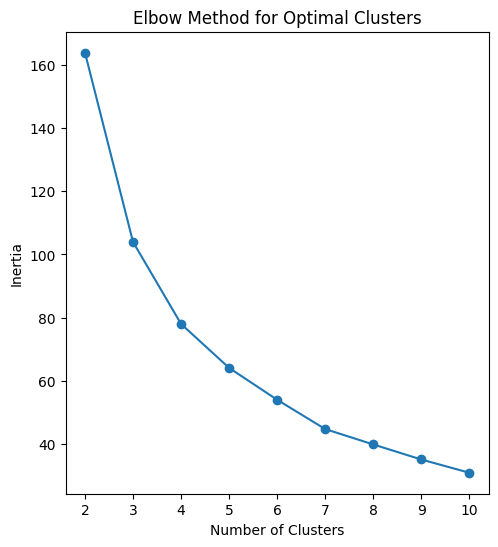

In [4]:
# Plot the Elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')



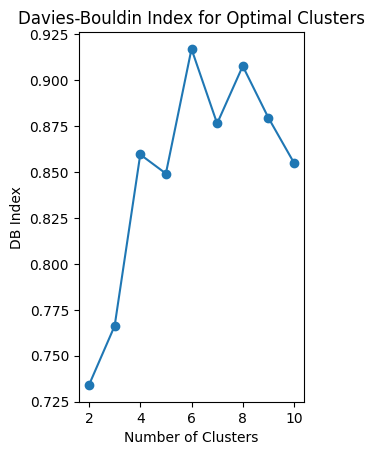

In [5]:
# Plot DB Index
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()



In [6]:
# Choose the optimal number of clusters (for example, let's say 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_profile['Cluster'] = kmeans.fit_predict(X)



In [7]:
# Calculate DB Index for the chosen clusters
db_index = davies_bouldin_score(X, customer_profile['Cluster'])



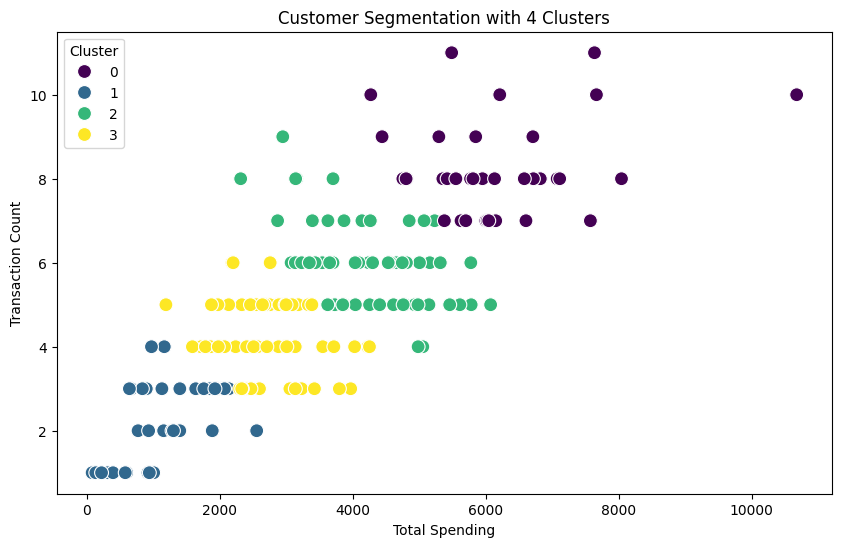

In [8]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_profile['TotalSpending'], y=customer_profile['TransactionCount'], hue=customer_profile['Cluster'], palette='viridis', s=100)
plt.title(f'Customer Segmentation with {optimal_clusters} Clusters')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()



In [9]:
# Report results
print(f"Number of clusters formed: {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Number of clusters formed: 4
Davies-Bouldin Index: 0.8595
